4728.8099


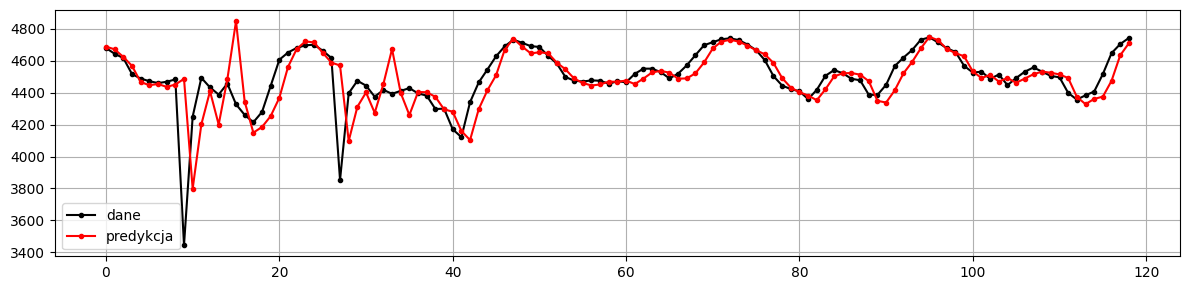

In [132]:
import numpy as np
from sklearn.neural_network import MLPRegressor
np.random.seed(2137)

def get_windows(signal, n):
    n_max = len(signal) - n
    X = np.array([signal[i:i+n] for i in range(n_max)])
    y = signal[n:]
    return X, y

data = np.genfromtxt("./press1.csv")
print(data[0])
X, y = get_windows(data, 8)
#minsquare error sqaured true


def train_validate_test(data, trainf, validatef, testf):
    indexes = np.arange(len(data))
    #np.random.shuffle(indexes)
    count = len(indexes)
    train, validate, test = int(count*trainf), int(count*validatef), int(count* testf)
    train_index, validate_index, test_index = indexes[:train], indexes[train:train+validate], indexes[train+validate+1:]
    
    return train_index, validate_index, test_index

train_index, validate_index, test_index = train_validate_test(np.arange(len(X)), 0.6, 0.2, 0.2)

train_x = X[train_index]
train_y = y[train_index]

layers = [20, 10, 5]

validate_x = X[validate_index]
validate_y = y[validate_index]


test_x = X[test_index]
test_y = y[test_index]

nn = MLPRegressor(hidden_layer_sizes=layers, max_iter=1000)
nn.fit(train_x, train_y)
yn = nn.predict(test_x)

import matplotlib.pyplot as plt
plt.figure('data/prediction', figsize=(12, 3))
plt.plot(y[test_index], 'k.-', label='dane')
plt.plot(yn, 'r.-', label='predykcja')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [117]:
import numpy as np

def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Example usage
actual_values = test_y
predicted_values = yn

rmse_value = rmse(actual_values, predicted_values)
print("RMSE:", rmse_value)

RMSE: 156.74649606442816
